## Cats Vs Dogs Classification

In [7]:
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

"# This will require you doing a lot of data preprocessing because\n# the dataset isn't split into training and validation for you\n# This code block has all the required inputs\nimport os\nimport zipfile\nimport random\nimport tensorflow as tf\nfrom tensorflow.keras.optimizers import RMSprop\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\nfrom shutil import copyfile"

#### Two way to import the data 
1st one 

In [8]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL
'''
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/02.Convolutional_Neural_Networks/tmp/cats-and-dogs.zip"

local_zip = r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/02.Convolutional_Neural_Networks/tmp/cats-and-dogs.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()'''

'\n!wget --no-check-certificate     "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"     -O r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/02.Convolutional_Neural_Networks/tmp/cats-and-dogs.zip"\n\nlocal_zip = r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/02.Convolutional_Neural_Networks/tmp/cats-and-dogs.zip"\nzip_ref = zipfile.ZipFile(local_zip, \'r\')\nzip_ref.extractall(\'/tmp\')\nzip_ref.close()'

2nd one 

In [ ]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

In [ ]:
from zipfile import ZipFile
zf = ZipFile(r'C:\Users\Santosh\becode\04.Deep_Learning\00.Deep_Neural_Networks\01.Keras\kagglecatsanddogs_3367a.zip','r')
zf.extractall(r'C:\Users\Santosh\becode\04.Deep_Learning\00.Deep_Neural_Networks\01.Keras\Kegaalecatsndogs')
zf.close()

In [15]:
print(len(os.listdir(r'C:\Users\Santosh\becode\04.Deep_Learning\00.Deep_Neural_Networks\01.Keras\Kegaalecatsndogs\PetImages\Cat')))
print(len(os.listdir(r'C:\Users\Santosh\becode\04.Deep_Learning\00.Deep_Neural_Networks\01.Keras\Kegaalecatsndogs\PetImages\Dog')))

11749
11675


In [10]:

# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    #os.mkdir('/tmp/cats-v-dogs')
    os.mkdir(r'C:\Users\Santosh\becode\04.Deep_Learning\00.Deep_Neural_Networks\01.Keras\Kegaalecatsndogs\PetImages\training')
    os.mkdir(r'C:\Users\Santosh\becode\04.Deep_Learning\00.Deep_Neural_Networks\01.Keras\Kegaalecatsndogs\PetImages\testing')
    os.mkdir(r'C:\Users\Santosh\becode\04.Deep_Learning\00.Deep_Neural_Networks\01.Keras\Kegaalecatsndogs\PetImages\training\cats')
    os.mkdir(r'C:\\Users\Santosh\becode\04.Deep_Learning\00.Deep_Neural_Networks\01.Keras\Kegaalecatsndogs\PetImages\training\dogs')
    os.mkdir(r'C:\Users\Santosh\becode\04.Deep_Learning\00.Deep_Neural_Networks\01.Keras\Kegaalecatsndogs\PetImages\testing\cats')
    os.mkdir(r'C:\Users\Santosh\becode\04.Deep_Learning\00.Deep_Neural_Networks\01.Keras\Kegaalecatsndogs\PetImages\testing\dogs')
except OSError:
    pass

In [21]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    dataset = []
    
    for unitData in os.listdir(SOURCE):
        data = SOURCE + "/" + unitData
        if (os.path.getsize(data) > 0):
            dataset.append(unitData)
        else:
            print('Skipped ' + unitData)
            print('Invalid file size! i.e Zero length.')
    
    train_data_length = int(len(dataset) * SPLIT_SIZE)
    test_data_length = int(len(dataset) - train_data_length)
    shuffled_set = random.sample(dataset, len(dataset))
    train_set = shuffled_set[0:train_data_length]
    test_set = shuffled_set[-test_data_length:]
    
    for unitData in train_set:
        temp_train_data = SOURCE + "/" + unitData
        final_train_data = TRAINING + "/" + unitData
        copyfile(temp_train_data, final_train_data)
    
    for unitData in test_set:
        temp_test_data = SOURCE + "/" + unitData
        final_test_data = TESTING + "/" + unitData
        copyfile(temp_train_data, final_test_data)
        
        
CAT_SOURCE_DIR = r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/01.Keras/Kegaalecatsndogs/PetImages/Cat"
TRAINING_CATS_DIR = r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/01.Keras/Kegaalecatsndogs/PetImages/training/cats"
TESTING_CATS_DIR = r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/01.Keras/Kegaalecatsndogs/PetImages/testing/cats"
DOG_SOURCE_DIR = r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/01.Keras/Kegaalecatsndogs/PetImages/Dog"
TRAINING_DOGS_DIR = r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/01.Keras/Kegaalecatsndogs/PetImages/training/dogs"
TESTING_DOGS_DIR = r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/01.Keras/Kegaalecatsndogs/PetImages/testing/dogs"

split_size = .8
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)


In [22]:
print(len(os.listdir(r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/01.Keras/Kegaalecatsndogs/PetImages/Cat/")))
print(len(os.listdir(r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/01.Keras/Kegaalecatsndogs/PetImages/training/cats/")))
print(len(os.listdir(r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/01.Keras/Kegaalecatsndogs/PetImages/testing/cats/")))
print(len(os.listdir(r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/01.Keras/Kegaalecatsndogs/PetImages/Dog/")))
print(len(os.listdir(r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/01.Keras/Kegaalecatsndogs/PetImages/training/dogs/")))
print(len(os.listdir(r"C:/Users/Santosh/becode/04.Deep_Learning/00.Deep_Neural_Networks/01.Keras/Kegaalecatsndogs/PetImages/testing/dogs/")))            

11749
9399
4220
11675
9340
4217


In [24]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [26]:

TRAINING_DIR =  r"C:\Users\Santosh\becode\04.Deep_Learning\00.Deep_Neural_Networks\01.Keras\Kegaalecatsndogs\PetImages\training"
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    class_mode='binary', 
                                                    target_size=(150, 150))

VALIDATION_DIR = r"C:\Users\Santosh\becode\04.Deep_Learning\00.Deep_Neural_Networks\01.Keras\Kegaalecatsndogs\PetImages\testing"
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = train_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         class_mode='binary', 
                                                         target_size=(150, 150))

Found 18737 images belonging to 2 classes.
Found 8437 images belonging to 2 classes.


In [27]:
history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/15
1874/1874 [==============================] - 913s 485ms/step - loss: 0.6835 - accuracy: 0.6498 - val_loss: 0.1942 - val_accuracy: 1.0000
Epoch 2/15
1874/1874 [==============================] - 1112s 593ms/step - loss: 0.4716 - accuracy: 0.7847 - val_loss: 0.1689 - val_accuracy: 1.0000
Epoch 3/15
1874/1874 [==============================] - 1234s 658ms/step - loss: 0.4212 - accuracy: 0.8195 - val_loss: 0.2318 - val_accuracy: 1.0000
Epoch 4/15
1874/1874 [==============================] - 996s 532ms/step - loss: 0.4096 - accuracy: 0.8270 - val_loss: 0.1056 - val_accuracy: 1.0000
Epoch 5/15
1874/1874 [==============================] - 1276s 681ms/step - loss: 0.3852 - accuracy: 0.8431 - val_loss: 0.0914 - val_accuracy: 1.0000
Epoch 6/15
1874/1874 [==============================] - 1714s 914ms/step - loss: 0.3780 - accuracy: 0.8512 - val_loss: 0.0841 - val_accuracy: 1.0000
Epoch 7/15
1874/1874 [==============================] - 1505s 803ms/step - loss: 0.3654 - accuracy: 0.8527 -

Text(0.5, 1.0, 'Training and validation loss')

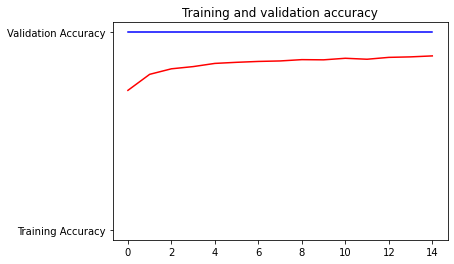

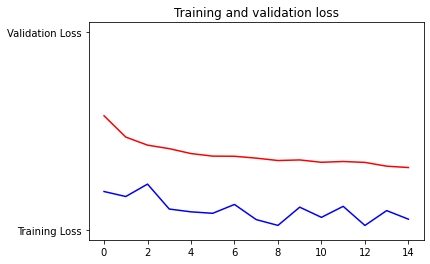

In [29]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")

plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [31]:

# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

'''import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(# YOUR CODE HERE))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")'''

'import numpy as np\nfrom google.colab import files\nfrom keras.preprocessing import image\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n \n  # predicting images\n  path = \'/content/\' + fn\n  img = image.load_img(path, target_size=(# YOUR CODE HERE))\n  x = image.img_to_array(img)\n  x = np.expand_dims(x, axis=0)\n\n  images = np.vstack([x])\n  classes = model.predict(images, batch_size=10)\n  print(classes[0])\n  if classes[0]>0.5:\n    print(fn + " is a dog")\n  else:\n    print(fn + " is a cat")'

In [ ]:
'''# Creating some predictions.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

"""
You could make predictions on the test set, but use the test set only at the very end of your project, once you have a classifier that you are ready to launch.
"""

# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

# Finding precision and recall
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

# To compute the F1 score, simply call the f1_score() function:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)'''